In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
def freq_response_plot(b, a, fs):
    
    # freq is the discrete frequency value on the frequency axis
    # H is the frequency response value evaluate on those frequencies
    freq, H = scipy.signal.freqz(b, a, fs=fs)
    
    # plot the amplitude response and the phase response
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
    
    ax1.set_title('amplitude response')
    ax1.plot(freq, 20 * np.log10(abs(H)), 'b')
    ax1.set_ylabel('Amplitude [dB]')
    ax1.set_xlabel('Frequency [Hz]')
    
    ax2.set_title('phase response')
    ax2.plot(freq, np.unwrap(np.angle(H)), 'g')
    ax2.set_ylabel('Angle [rad]')
    ax2.set_xlabel('Frequency [Hz]')
    
    plt.show()

In [3]:
def pole_zero_plot(b, a):
    
    # pole-zero analysis
    zeros, poles, gain = scipy.signal.tf2zpk(b, a)
    
    # plot poles and zeros
    fig, ax = plt.subplots(figsize = (6, 6))
    ax.set_title('pole-zero plot')
    
    circle = Circle(xy = (0.0, 0.0), radius = 1, facecolor = 'w', edgecolor = 'purple')
    ax.add_patch(circle)
    
    for i in zeros:
        z, = ax.plot(np.real(i), np.imag(i), 'ro')
    for i in poles:
        p, = ax.plot(np.real(i), np.imag(i), 'bx')
        
    handles = []
    labels = []
    if len(zeros) > 0:
        handles.append(z)
        labels.append('zeros')
    if len(poles) > 0:
        handles.append(p)
        labels.append('poles')
        
    ax.legend(handles, labels)
    ax.set_xlabel('real')
    ax.set_ylabel('imaginary')
    ax.set_aspect(1)
    ax.grid()
    plt.show()

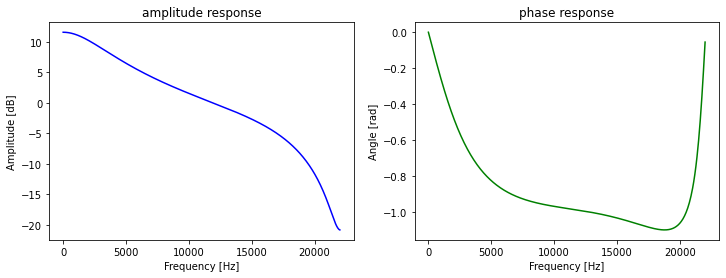

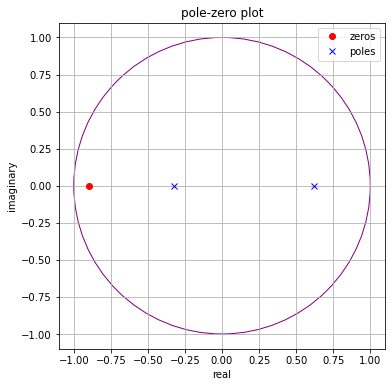

In [4]:
# linear filter with feed-back/feed-forward coefficients

# define feed-forward coefficients
b = [1, 0.9]

# define feed-back coefficients
a = [1, -0.3, -0.2]

# input signal and sampling rate
x = [1, 0, 0, 0, 0, 0]
fs = 44100

# output signal
y = scipy.signal.lfilter(b, a, x)

# frequency response plot
freq_response_plot(b, a, fs)

# pole-zero plot
pole_zero_plot(b, a)